## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
n = application_df.nunique(axis=0)
n

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

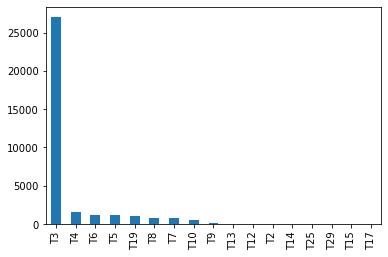

In [4]:
# histogram
# hist = application_df.hist(column='APPLICATION_TYPE')
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(['T13', 'T12', 'T2','T25','T14','T29','T15','T17'], 'Other')

In [6]:
application_df['APPLICATION_TYPE']

0        T10
1         T3
2         T5
3         T3
4         T3
        ... 
34294     T4
34295     T4
34296     T3
34297     T5
34298     T3
Name: APPLICATION_TYPE, Length: 34299, dtype: object

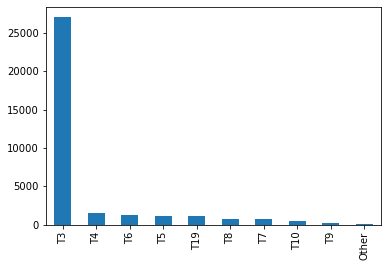

In [7]:
# histogram
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

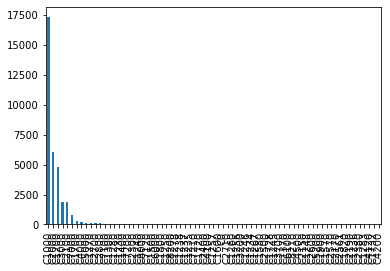

In [9]:
# Look at CLASSIFICATION value counts for binning
# histogram
application_df['CLASSIFICATION'].value_counts().plot(kind='bar')

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_n = application_df['CLASSIFICATION'].value_counts()
#select n greater than 1
classification_n[classification_n > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C1256        2
C3200        2
C1246        2
C1234        2
C1267        2
Name: CLASSIFICATION, dtype: int64

In [40]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace = classification_n[classification_n <= 20]
classifications_to_replace.index


Index(['C8000', 'C7120', 'C1500', 'C6000', 'C1800', 'C1250', 'C8200', 'C1278',
       'C1238', 'C1237', 'C1235', 'C7210', 'C1720', 'C2400', 'C4100', 'C1257',
       'C1600', 'C0', 'C2710', 'C1260', 'C1256', 'C3200', 'C1246', 'C1234',
       'C1267', 'C1580', 'C2500', 'C1728', 'C1245', 'C3700', 'C1370', 'C6100',
       'C8210', 'C4500', 'C2150', 'C1248', 'C2600', 'C5200', 'C1900', 'C1570',
       'C2570', 'C2170', 'C2561', 'C1820', 'C2190', 'C1236', 'C2380', 'C1283',
       'C4120', 'C1732', 'C4200'],
      dtype='object')

In [12]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace.index, 'Other')

In [13]:
# # Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
Other      227
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [16]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# Split our preprocessed data into our features and target arrays
target_y = application_df["IS_SUCCESSFUL"]
features_x = application_df.drop(columns=["IS_SUCCESSFUL"])


# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(features_x, target_y)


# Check data shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25724, 59), (8575, 59), (25724,), (8575,))

In [52]:
# Create a StandardScaler instances  (make it into normal distribution)
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#(nn is neural network)

nn = tf.keras.models.Sequential()

n_input_features = 59
n_hidden_neurons = 8


# set up the first input / features layer
nn.add(tf.keras.Input(shape=(n_input_features,)))


# First hidden layer
nn.add(tf.keras.layers.Dense(n_hidden_neurons, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(n_hidden_neurons, activation="relu"))


# Output layer
# Doing binary classification, so need 1 as output
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 8)                 480       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 9         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compile the model
# This builds the model for the first time:

nn.compile(loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
# Train the model
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="temp/checkpoint", 
    verbose=1, 
    save_weights_only=True,
    period= 5)

# Train the model with the new callback
nn.fit(x_train_scaled, y_train, batch_size=64, epochs=30,
          callbacks=[cp_callback])


Epoch 1/30
402/402 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6455
Epoch 2/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7210
Epoch 3/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7240
Epoch 4/30
402/402 [==============================] - 0s 773us/step - loss: 0.5578 - accuracy: 0.7262
Epoch 5/30
369/402 [==========================>...] - ETA: 0s - loss: 0.5556 - accuracy: 0.7286
Epoch 00005: saving model to temp\checkpoint
402/402 [==============================] - 0s 948us/step - loss: 0.5568 - accuracy: 0.7275
Epoch 6/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7259
Epoch 7/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7269
Epoch 8/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7271: 0s - loss: 0.5555 - accura
Epoch 9/30
402/402 [==================

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5566 - accuracy: 0.7259
Loss: 0.5566044449806213, Accuracy: 0.7259474992752075


In [57]:
# Export model to HDF5 file

nn.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [58]:
# Test Models three attempts

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#(nn is neural network)

# Write a funtion of the test
def build_and_test_model(n_hidden_neurons=8, batch_size=64, n_layers=2):

    nn = tf.keras.models.Sequential()

    n_input_features = 59

    # set up the first input / features layer
    nn.add(tf.keras.Input(shape=(n_input_features,)))

    
    # Add hidden layer forloop
    
    for i in range(n_layers):
        nn.add(tf.keras.layers.Dense(n_hidden_neurons, activation="relu"))
        

    # Output layer
    # Doing binary classification, so need 1 as output
    nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    # Check the structure of the model
    nn.summary()
    
    # Compile the model ---------------------------------------------------
    # This builds the model for the first time:

    nn.compile(loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model -----------------------------------------------------

    # Create a callback that saves the model's weights every 5 epochs
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath="temp/checkpoint", 
        verbose=1, 
        save_weights_only=True,
        period= 5)

    # Train the model with the new callback
    nn.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=30,
              callbacks=[cp_callback])
    
    # Evaluate the model using the test data ------------------------------
    model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    #
    return nn
    
nn_1 = build_and_test_model(n_hidden_neurons=12, batch_size=128, n_layers=3)
nn_2 = build_and_test_model(n_hidden_neurons=4, batch_size=64, n_layers=3)   
nn_3 = build_and_test_model(n_hidden_neurons=8, batch_size=64, n_layers=5)   
    
    
    
    
    



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 12)                720       
_________________________________________________________________
dense_44 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_45 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 13        
Total params: 1,045
Trainable params: 1,045
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
201/201 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.6781
Epoch 2/30
201/201 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7215
Epoch 3/30
201/201 [=============================

402/402 [==============================] - 0s 844us/step - loss: 0.5547 - accuracy: 0.7280
Epoch 19/30
402/402 [==============================] - 0s 810us/step - loss: 0.5546 - accuracy: 0.7296
Epoch 20/30
365/402 [==========================>...] - ETA: 0s - loss: 0.5544 - accuracy: 0.7274
Epoch 00020: saving model to temp\checkpoint
402/402 [==============================] - 0s 781us/step - loss: 0.5544 - accuracy: 0.7277
Epoch 21/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7291
Epoch 22/30
402/402 [==============================] - 0s 834us/step - loss: 0.5539 - accuracy: 0.7292
Epoch 23/30
402/402 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7298
Epoch 24/30
402/402 [==============================] - 0s 810us/step - loss: 0.5537 - accuracy: 0.7296
Epoch 25/30
387/402 [===========================>..] - ETA: 0s - loss: 0.5532 - accuracy: 0.7293
Epoch 00025: saving model to temp\checkpoint
402/402 [==============

In [60]:
nn_3.save("AlphabetSoupCharity_Optimization.h5")

In [34]:
# n = 5
# for i in list(range(n)):
#     print (i*3)



0
3
6
9
12


In [38]:
# n = 5
# for i in list(range(n)):
#     print (i*3)


0
3
6
9
12


In [39]:
# n = 5
# total=0
# for i in list(range(n)):
#     total = total + i
#     print(total)
    
    



0
1
3
6
10
